In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# **Introducción**

El **análisis del abandono** [churn analysis] tiene el objetivo de identificar a los clientes que presenten altas probabilidades de abandonar a una organización, brindando la posibilidad de ejecutar acciones oportunas para su retención, principalmente, de los que representen el mayor valor.

El análsis se puede abordar como un problema de clasificación binaria en el que se busca predecir si un cliente abandonará a la organización dentro de una ventana de tiempo razonable (generalmente en los 6 meses posteriores a la obtención de los datos).

De manera que la metodología a seguir para estos estudios puede inspirarse en la metodología CRISP-DM:

## **Metodología**


### **Adquisición de datos**

1. **Identificamos variables** que puedan ser predictores del abandono, principalmente variables socio-demográficas y de uso. Entre las variables más utilizadas encontramos a la recencia, la frecuencia y el valor monetario.
2. Se selecciona una **muestra** de clientes para construir y evaluar el modelo, la cual debe ser representativa y extensa.
3. Se fija un **periodo de observación** (generalmente de un año) en el cual se tiene disponibles los valores de las variables predictoras sobre la muestra.
4. Se **depura la muestra** para considerar sólo a los clientes que no abandonaron durante el periodo de observación. 
5. Se **registra la permanencia o el abandono** de los clientes de la muestra durante una ventana de tiempo razonable (de 4 a 6 meses) después del periodo de observación.


Como producto de estos pasos se obtiene un conjunto de datos con los que se puede construir un modelo del abandono de clientes. 

### **Modelo**

El fenómeno que buscamos modelar corresponde a un problema de clasificación binaria (abanono o no abandono), por lo que es recomendable explorar alguna de las siguientes técnicas:

1. Regresión logística.
2. Árboles de clasificación (de preferencia con métodos de ensamble).
3. Máquinas de soporte vectorial.
3. Redes neuronales.

### **Evaluación**

Además de las métricas clásicas para evaluar un modelo para la clasificación binaria, podemos explorar alternativas como:

1. Lift.
2. Ganancia.

Las cuales describiremos a partir de un caso de estudio. 

### **Implementación**

Una vez que el se ha validado el modelo, es necesario aplicarlo sobre todos los clientes para **identificar a aquellos con la mayor propensión** a abandonar a la organización y sobre ellos ejecutar acciones oportunas, **priorizando a los de mayor valor**.  

El modelo se debe mantener actualizado, por ejemplo, repitiendo el estudio cada 6 meses:

<img src = "https://drive.google.com/uc?export=view&id=1AehVhXcaKFblQ4KX9smW1j7SiwPgrGSc" width="700"/>



En las siguientes celdas se explora un caso de estudio.


# Caso de estudio

El caso de estudio que revisaremos corresponde a datos de una institución bancaria. Los clientes son usuarios de tarjetas de crédito para los que se dispone de datos de variables demográficas (edad, género y estado civil) y de uso.

Para el estudio, se definió un periodo de observación de un año, seguido de un periodo de 4 meses en el que se registró el abandono o permanencia de los clientes de la muestra.

En este estudio se definió como abandono a aquellos casos de clientes que voluntaria y explícitamente cerraron sus cuentas. 

los datos son los siguientes:

In [2]:
dat <- read.csv("CC_CHURN_MODELING_DATA.csv")
head(dat)

,CUSTOMER_ID,GENDER,EDUCATION,MARITAL_STATUS,AGE,NUM_CARDS_Sum,LIMIT_Sum,SPENDING_AMOUNT_.1._Sum,SPENDING_AMOUNT_.2._Sum,SPENDING_AMOUNT_.3._Sum,⋯,DELTA_TRX,AVG_TRX_AMOUNT,AVG_BALANCES,BALANCES_FREQUENCY,SPENDING_LIMIT_RATIO,LIMIT_USAGE,END_START_CARDS_DELTAS,END_WITHIN_CARDS_DELTAS,AGE_BANDS,CHURN
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<lgl>
1,C100001,Female,College,Married,33.83562,1,1000,0.00,0.00,0.00,⋯,1.666667,212.87000,1143.2050,1.000000,0.159653,1.143205,0,0,25-34,FALSE
2,C100002,Female,n/a,Married,55.53973,1,500,80.38,66.00,63.81,⋯,0.000000,25.83038,335.7950,1.000000,0.335795,0.671590,0,0,55+,FALSE
3,C100003,Female,n/a,Married,23.93699,1,1000,361.42,184.49,30.00,⋯,-0.440234,27.49833,1714.8065,1.055636,0.159655,1.714807,1,0,18-24,FALSE
4,C100004,Female,College,Married,24.16986,1,2000,32.21,45.00,55.43,⋯,0.018868,61.38358,2190.5550,1.000000,0.135555,1.095277,0,0,18-24,FALSE
5,C100005,Male,College,Single,29.44384,1,750,72.20,29.49,324.46,⋯,0.227273,16.54454,1436.4300,1.000000,0.080884,1.915240,0,0,25-34,FALSE
6,C100006,Female,High Scool,Married,42.41918,1,1000,0.00,0.00,0.00,⋯,-0.020433,30.73033,464.7984,1.045962,0.196071,0.464798,1,0,35-44,FALSE


In [3]:
str(dat)

'data.frame':	22693 obs. of  82 variables:
 $ CUSTOMER_ID                     : chr  "C100001" "C100002" "C100003" "C100004" ...
 $ GENDER                          : chr  "Female" "Female" "Female" "Female" ...
 $ EDUCATION                       : chr  "College" "n/a" "n/a" "College" ...
 $ MARITAL_STATUS                  : chr  "Married" "Married" "Married" "Married" ...
 $ AGE                             : num  33.8 55.5 23.9 24.2 29.4 ...
 $ NUM_CARDS_Sum                   : int  1 1 1 1 1 1 3 1 1 2 ...
 $ LIMIT_Sum                       : int  1000 500 1000 2000 750 1000 1000 500 1000 2000 ...
 $ SPENDING_AMOUNT_.1._Sum         : num  0 80.4 361.4 32.2 72.2 ...
 $ SPENDING_AMOUNT_.2._Sum         : num  0 66 184.5 45 29.5 ...
 $ SPENDING_AMOUNT_.3._Sum         : num  0 63.8 30 55.4 324.5 ...
 $ SPENDING_AMOUNT_.4._Sum         : num  0 204 180 63 50.9 ...
 $ SPENDING_AMOUNT_.5._Sum         : num  0 92 25.2 413.1 0 ...
 $ SPENDING_AMOUNT_.6._Sum         : num  396 227 237 369 0 ...
 $

La siguiente celda muestra la lista de varibles que se seleccionaron para este estudio.

In [4]:
################
#predictores
################

# GENDER 
  'Gender of the customer'
# MARITAL_STATUS 
  'Marital status of the customer'
# AGE 
  'Age of the customer'
# NUM_CARDS_Sum 
 'The total number of add‐on cards based on all primary cards a customer had within the observation period'
# TENURE_CUSTOMER
  'Months since first registration of the customer'
# AVG_SPENDING_AMOUNT
  'Monthly average spending (purchases and cash advance) for the 12 months of the observation
  period. Based on all cards that each customer had within the observation period'
# SPENDING_RECENCY
  'Months since the last spending transaction'
# SPENDING_FREQUENCY
  'Percentage of the months with spending transactions'
# DELTA_SPENDING_FREQUENCY
  'Relative change (percentage increase or decrease) in spending frequency during 
  the last 4 months of the observation period'
# DELTA_SPENDING_AMOUNT
  'Relative change (percentage increase or decrease) in monthly average spending during 
  the last 4 months of the observation period'
# AVG_TRX
  'Monthly average number of spending transactions for the 12 months of the observation period'
# DELTA_TRX
  'Relative change (percentage increase or decrease) in monthly average number of transactions
  during the last 4 months of the observation period'
# AVG_TRX_AMOUNT
  'Average spending amount per transaction'
# AVG_BALANCES
  'Monthly average balance for the 12 months of the observation period'
# BALANCES_FREQUENCY
  'Percentage of the months with balances'
# SPENDING_LIMIT_RATIO
  'Ratio of spending amount to credit limit'
# LIMIT_USAGE
  'Ratio of balances to credit limit'
# END_START_CARDS_DELTAS
  'Difference in the number of open cards between the end and the start of the observation period'
# END_WITHIN_CARDS_DELTAS
  'Change in the number of open cards a customer had at the end of the observation period 
  compared to all the cards that had possessed at some point within the observation period'

################
#respuesta (target)
################

# CHURN


[1] "Gender of the customer"

[1] "Marital status of the customer"

[1] "Age of the customer"

[1] "The total number of add‐on cards based on all primary cards a customer had within the observation period"

[1] "Months since first registration of the customer"

[1] "Monthly average spending (purchases and cash advance) for the 12 months of the observation\n  period. Based on all cards that each customer had within the observation period"

[1] "Months since the last spending transaction"

[1] "Percentage of the months with spending transactions"

[1] "Relative change (percentage increase or decrease) in spending frequency during \n  the last 4 months of the observation period"

[1] "Relative change (percentage increase or decrease) in monthly average spending during \n  the last 4 months of the observation period"

[1] "Monthly average number of spending transactions for the 12 months of the observation period"

[1] "Relative change (percentage increase or decrease) in monthly average number of transactions\n  during the last 4 months of the observation period"

[1] "Average spending amount per transaction"

[1] "Monthly average balance for the 12 months of the observation period"

[1] "Percentage of the months with balances"

[1] "Ratio of spending amount to credit limit"

[1] "Ratio of balances to credit limit"

[1] "Difference in the number of open cards between the end and the start of the observation period"

[1] "Change in the number of open cards a customer had at the end of the observation period \n  compared to all the cards that had possessed at some point within the observation period"

**Selecciona las variables de interés**

In [5]:
dat <- dat %>% select(GENDER, MARITAL_STATUS, AGE, NUM_CARDS_Sum, TENURE_CUSTOMER, AVG_SPENDING_AMOUNT, SPENDING_RECENCY,
  SPENDING_FREQUENCY, DELTA_SPENDING_FREQUENCY, DELTA_SPENDING_AMOUNT, AVG_TRX, DELTA_TRX, AVG_TRX_AMOUNT, AVG_BALANCES,
  BALANCES_FREQUENCY, SPENDING_LIMIT_RATIO, LIMIT_USAGE, END_START_CARDS_DELTAS, END_WITHIN_CARDS_DELTAS, CHURN)

dat$CHURN <- ifelse(dat$CHURN, 1, 0) #cast a binario

head(dat)  


,GENDER,MARITAL_STATUS,AGE,NUM_CARDS_Sum,TENURE_CUSTOMER,AVG_SPENDING_AMOUNT,SPENDING_RECENCY,SPENDING_FREQUENCY,DELTA_SPENDING_FREQUENCY,DELTA_SPENDING_AMOUNT,AVG_TRX,DELTA_TRX,AVG_TRX_AMOUNT,AVG_BALANCES,BALANCES_FREQUENCY,SPENDING_LIMIT_RATIO,LIMIT_USAGE,END_START_CARDS_DELTAS,END_WITHIN_CARDS_DELTAS,CHURN
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Female,Married,33.83562,1,16.295688,159.65250,0.229979,0.416667,1.400000,1.379559,0.750000,1.666667,212.87000,1143.2050,1.000000,0.159653,1.143205,0,0,0
2,Female,Married,55.53973,1,13.305955,167.89750,0.657084,1.000000,0.000000,0.518635,6.500000,0.000000,25.83038,335.7950,1.000000,0.335795,0.671590,0,0,0
3,Female,Married,23.93699,1,11.367556,159.65524,1.084189,0.879697,-0.431622,-0.536752,5.805997,-0.440234,27.49833,1714.8065,1.055636,0.159655,1.714807,1,0,0
4,Female,Married,24.16986,1,15.540041,271.11083,0.657084,1.000000,0.000000,0.662115,4.416667,0.018868,61.38358,2190.5550,1.000000,0.135555,1.095277,0,0,0
5,Male,Single,29.44384,1,14.422998,60.66333,0.229979,0.583333,0.285714,0.033944,3.666667,0.227273,16.54454,1436.4300,1.000000,0.080884,1.915240,0,0,0
6,Female,Married,42.41918,1,9.560575,196.07084,0.295688,0.941366,0.062286,0.110364,6.380369,-0.020433,30.73033,464.7984,1.045962,0.196071,0.464798,1,0,0


In [6]:
str(dat)

'data.frame':	22693 obs. of  20 variables:
 $ GENDER                  : chr  "Female" "Female" "Female" "Female" ...
 $ MARITAL_STATUS          : chr  "Married" "Married" "Married" "Married" ...
 $ AGE                     : num  33.8 55.5 23.9 24.2 29.4 ...
 $ NUM_CARDS_Sum           : int  1 1 1 1 1 1 3 1 1 2 ...
 $ TENURE_CUSTOMER         : num  16.3 13.3 11.4 15.5 14.4 ...
 $ AVG_SPENDING_AMOUNT     : num  159.7 167.9 159.7 271.1 60.7 ...
 $ SPENDING_RECENCY        : num  0.23 0.657 1.084 0.657 0.23 ...
 $ SPENDING_FREQUENCY      : num  0.417 1 0.88 1 0.583 ...
 $ DELTA_SPENDING_FREQUENCY: num  1.4 0 -0.432 0 0.286 ...
 $ DELTA_SPENDING_AMOUNT   : num  1.3796 0.5186 -0.5368 0.6621 0.0339 ...
 $ AVG_TRX                 : num  0.75 6.5 5.81 4.42 3.67 ...
 $ DELTA_TRX               : num  1.6667 0 -0.4402 0.0189 0.2273 ...
 $ AVG_TRX_AMOUNT          : num  212.9 25.8 27.5 61.4 16.5 ...
 $ AVG_BALANCES            : num  1143 336 1715 2191 1436 ...
 $ BALANCES_FREQUENCY      : num  1 1 1

**La etiqueta no está balanceada**

In [7]:
summary(dat$CHURN)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.06963 0.00000 1.00000 

In [8]:
dat$CHURN_CAT <-factor(dat$CHURN)

dat %>% group_by(CHURN_CAT) %>% summarise(PORC = n()/nrow(dat)*100)

CHURN_CAT,PORC
<fct>,<dbl>
0,93.037501
1,6.962499


**Subconjuntos de entrenamiento y prueba**

Separamos los subconjuntos a partir de un muestreo estratificado (preservando la proporción de abandono/no-abandono en ambos conjuntos).

In [9]:
install.packages("splitTools")
library(splitTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
set.seed(1)

ind <- partition(dat$CHURN_CAT, p = c(train = 0.7, test = 0.3))
names(ind)

[1] "train" "test"

In [11]:
train <- dat[ind$train,]
test <- dat[ind$test,]

head(train)

,GENDER,MARITAL_STATUS,AGE,NUM_CARDS_Sum,TENURE_CUSTOMER,AVG_SPENDING_AMOUNT,SPENDING_RECENCY,SPENDING_FREQUENCY,DELTA_SPENDING_FREQUENCY,DELTA_SPENDING_AMOUNT,⋯,DELTA_TRX,AVG_TRX_AMOUNT,AVG_BALANCES,BALANCES_FREQUENCY,SPENDING_LIMIT_RATIO,LIMIT_USAGE,END_START_CARDS_DELTAS,END_WITHIN_CARDS_DELTAS,CHURN,CHURN_CAT
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>
2,Female,Married,55.53973,1,13.305955,167.89750,0.657084,1.000000,0.000000,0.518635,⋯,0.000000,25.83038,335.7950,1.000000,0.335795,0.671590,0,0,0,0
3,Female,Married,23.93699,1,11.367556,159.65524,1.084189,0.879697,-0.431622,-0.536752,⋯,-0.440234,27.49833,1714.8065,1.055636,0.159655,1.714807,1,0,0,0
4,Female,Married,24.16986,1,15.540041,271.11083,0.657084,1.000000,0.000000,0.662115,⋯,0.018868,61.38358,2190.5550,1.000000,0.135555,1.095277,0,0,0,0
5,Male,Single,29.44384,1,14.422998,60.66333,0.229979,0.583333,0.285714,0.033944,⋯,0.227273,16.54454,1436.4300,1.000000,0.080884,1.915240,0,0,0,0
6,Female,Married,42.41918,1,9.560575,196.07084,0.295688,0.941366,0.062286,0.110364,⋯,-0.020433,30.73033,464.7984,1.045962,0.196071,0.464798,1,0,0,0
7,Female,Married,27.41918,3,23.589322,123.99833,0.328542,0.833333,0.200000,-0.195715,⋯,-0.175000,37.19950,407.4150,1.000000,0.123998,0.407415,0,0,0,0


Verificamos que la separación preserva la proporción entre abandono/no abandono

In [12]:
train %>% group_by(CHURN_CAT) %>% summarise(PORC = n()/nrow(train)*100)

CHURN_CAT,PORC
<fct>,<dbl>
0,93.037895
1,6.962105


In [13]:
test %>% group_by(CHURN_CAT) %>% summarise(PORC = n()/nrow(test)*100)

CHURN_CAT,PORC
<fct>,<dbl>
0,93.03658
1,6.96342


**Balanceamos el conjunto de entrenamiento**

Los casos de abandono son muy poco frecuentes por lo que para construir el conjunto de entrenamiento final compensamos su déficit sobremuestreándolos.

In [14]:
summary(train$CHURN_CAT)

0     1 
14780  1106

In [15]:
# churn --> 25%, no-churn -->75%

n1 <- 1106
n0 <- 3*n1

#separamos los conjuntos de datos
train1 <- train %>% filter(CHURN_CAT == '1')
train0 <- train %>% filter(CHURN_CAT == '0') %>% sample_n(n0)


In [16]:
head(train0)

,GENDER,MARITAL_STATUS,AGE,NUM_CARDS_Sum,TENURE_CUSTOMER,AVG_SPENDING_AMOUNT,SPENDING_RECENCY,SPENDING_FREQUENCY,DELTA_SPENDING_FREQUENCY,DELTA_SPENDING_AMOUNT,⋯,DELTA_TRX,AVG_TRX_AMOUNT,AVG_BALANCES,BALANCES_FREQUENCY,SPENDING_LIMIT_RATIO,LIMIT_USAGE,END_START_CARDS_DELTAS,END_WITHIN_CARDS_DELTAS,CHURN,CHURN_CAT
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>
1,Female,Married,54.14520,1,114.23409,160.18417,0.361396,1.000000,0.000000,-0.133404,⋯,0.021978,21.12319,322.3233,1,0.106789,0.214882,0,0,0,0
2,Female,Married,34.10137,1,59.69610,164.81333,0.525667,0.916667,0.090909,0.295905,⋯,0.271186,33.52136,1418.7350,1,0.109876,0.945823,0,0,0,0
3,Female,Married,40.92055,2,64.75565,281.46750,0.295688,0.750000,0.333333,0.330207,⋯,0.551724,116.46931,4629.6867,1,0.093823,1.543229,0,0,0,0
4,Female,Married,60.74795,2,222.55442,67.00667,0.328542,0.750000,-0.333333,-0.092478,⋯,-0.205882,23.64941,1150.3683,1,0.089342,1.533824,0,0,0,0
5,Female,Married,57.48219,1,58.71047,152.78083,0.887064,0.833333,0.200000,0.074939,⋯,0.252747,20.14692,4858.1500,1,0.061112,1.943260,0,0,0,0
6,Male,n/a,49.93425,1,218.25051,621.82167,0.197125,1.000000,0.000000,0.246656,⋯,0.024138,25.73055,1243.6433,1,0.207274,0.414548,0,0,0,0


In [17]:
head(train1)

,GENDER,MARITAL_STATUS,AGE,NUM_CARDS_Sum,TENURE_CUSTOMER,AVG_SPENDING_AMOUNT,SPENDING_RECENCY,SPENDING_FREQUENCY,DELTA_SPENDING_FREQUENCY,DELTA_SPENDING_AMOUNT,⋯,DELTA_TRX,AVG_TRX_AMOUNT,AVG_BALANCES,BALANCES_FREQUENCY,SPENDING_LIMIT_RATIO,LIMIT_USAGE,END_START_CARDS_DELTAS,END_WITHIN_CARDS_DELTAS,CHURN,CHURN_CAT
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<fct>
1,Female,Single,27.93699,1,21.81519,290.9800,1.379877,0.916667,-0.181818,0.049703,⋯,-0.318182,39.67909,600.2267,0.916667,0.232784,0.480181,0,0,1,1
2,Male,Married,44.99178,3,23.26078,766.3325,0.624230,1.000000,0.000000,-0.440188,⋯,-0.015625,47.89578,1500.6717,1.000000,0.076633,0.150067,0,0,1,1
3,Female,Married,25.53425,1,30.65298,415.2242,0.164271,1.000000,0.000000,0.498070,⋯,0.203947,16.39043,1957.6800,1.000000,0.415224,1.957680,0,0,1,1
4,Male,Divorced / Widowed,55.61370,1,39.16222,397.9475,0.657084,1.000000,0.000000,-0.272907,⋯,-0.202312,27.60329,6090.5117,1.000000,0.088433,1.353447,0,0,1,1
5,Female,Married,34.20548,1,18.79261,112.4883,0.131417,0.916667,0.090909,0.881840,⋯,0.744186,15.69605,1122.8817,1.000000,0.112488,1.122882,0,0,1,1
6,Female,Married,33.89589,1,13.96304,303.8750,0.328542,1.000000,0.000000,0.381341,⋯,0.411765,35.75000,731.4133,1.000000,0.607750,1.462827,0,0,1,1


In [18]:
ttrain <- rbind(train0, train1)

In [19]:
str(ttrain)

'data.frame':	4424 obs. of  21 variables:
 $ GENDER                  : chr  "Female" "Female" "Female" "Female" ...
 $ MARITAL_STATUS          : chr  "Married" "Married" "Married" "Married" ...
 $ AGE                     : num  54.1 34.1 40.9 60.7 57.5 ...
 $ NUM_CARDS_Sum           : int  1 1 2 2 1 1 1 1 1 2 ...
 $ TENURE_CUSTOMER         : num  114.2 59.7 64.8 222.6 58.7 ...
 $ AVG_SPENDING_AMOUNT     : num  160 165 281 67 153 ...
 $ SPENDING_RECENCY        : num  0.361 0.526 0.296 0.329 0.887 ...
 $ SPENDING_FREQUENCY      : num  1 0.917 0.75 0.75 0.833 ...
 $ DELTA_SPENDING_FREQUENCY: num  0 0.0909 0.3333 -0.3333 0.2 ...
 $ DELTA_SPENDING_AMOUNT   : num  -0.1334 0.2959 0.3302 -0.0925 0.0749 ...
 $ AVG_TRX                 : num  7.58 4.92 2.42 2.83 7.58 ...
 $ DELTA_TRX               : num  0.022 0.271 0.552 -0.206 0.253 ...
 $ AVG_TRX_AMOUNT          : num  21.1 33.5 116.5 23.6 20.1 ...
 $ AVG_BALANCES            : num  322 1419 4630 1150 4858 ...
 $ BALANCES_FREQUENCY      : num  

In [20]:
ttrain %>% group_by(CHURN_CAT) %>% summarise(PORC = n()/nrow(ttrain)*100)

CHURN_CAT,PORC
<fct>,<dbl>
0,75
1,25


## Modelo

In [21]:
#Eliminamos la variable churn numérica
ttrain <- ttrain %>% select(-CHURN) 

In [22]:
r <- glm(CHURN_CAT ~ ., data = ttrain, family = "binomial")
summary(r)


Call:
glm(formula = CHURN_CAT ~ ., family = "binomial", data = ttrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.00759  -0.69776  -0.44315   0.02882   3.11995  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               2.864e+00  4.351e-01   6.582 4.66e-11 ***
GENDERMale                2.237e-01  8.242e-02   2.714  0.00665 ** 
MARITAL_STATUSMarried    -2.245e-01  2.079e-01  -1.080  0.28021    
MARITAL_STATUSn/a        -2.453e-01  2.168e-01  -1.132  0.25774    
MARITAL_STATUSSingle     -5.093e-01  2.304e-01  -2.210  0.02710 *  
AGE                      -9.064e-03  3.997e-03  -2.268  0.02335 *  
NUM_CARDS_Sum            -7.985e-02  7.250e-02  -1.101  0.27073    
TENURE_CUSTOMER          -1.250e-03  7.886e-04  -1.585  0.11305    
AVG_SPENDING_AMOUNT      -2.216e-03  5.270e-04  -4.205 2.62e-05 ***
SPENDING_RECENCY          1.072e-01  8.592e-02   1.247  0.21225    
SPENDING_FREQUENCY       -3.389e+00  2.86

# Depuración del modelo [selección de variables]

In [23]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [24]:
stepAIC(r, direction = "both")

Start:  AIC=4034.76
CHURN_CAT ~ GENDER + MARITAL_STATUS + AGE + NUM_CARDS_Sum + TENURE_CUSTOMER + 
    AVG_SPENDING_AMOUNT + SPENDING_RECENCY + SPENDING_FREQUENCY + 
    DELTA_SPENDING_FREQUENCY + DELTA_SPENDING_AMOUNT + AVG_TRX + 
    DELTA_TRX + AVG_TRX_AMOUNT + AVG_BALANCES + BALANCES_FREQUENCY + 
    SPENDING_LIMIT_RATIO + LIMIT_USAGE + END_START_CARDS_DELTAS + 
    END_WITHIN_CARDS_DELTAS

                           Df Deviance    AIC
- DELTA_TRX                 1   3990.8 4032.8
- DELTA_SPENDING_AMOUNT     1   3991.0 4033.0
- AVG_BALANCES              1   3991.6 4033.6
- END_WITHIN_CARDS_DELTAS   1   3991.7 4033.7
- END_START_CARDS_DELTAS    1   3991.7 4033.7
- AVG_TRX                   1   3992.0 4034.0
- NUM_CARDS_Sum             1   3992.0 4034.0
- SPENDING_LIMIT_RATIO      1   3992.2 4034.2
- SPENDING_RECENCY          1   3992.3 4034.3
<none>                          3990.8 4034.8
- TENURE_CUSTOMER           1   3993.3 4035.3
- BALANCES_FREQUENCY        1   3993.5 4035.5
- AV


Call:  glm(formula = CHURN_CAT ~ GENDER + MARITAL_STATUS + AGE + TENURE_CUSTOMER + 
    AVG_SPENDING_AMOUNT + SPENDING_FREQUENCY + DELTA_SPENDING_FREQUENCY + 
    AVG_TRX_AMOUNT + BALANCES_FREQUENCY + SPENDING_LIMIT_RATIO + 
    LIMIT_USAGE, family = "binomial", data = ttrain)

Coefficients:
             (Intercept)                GENDERMale     MARITAL_STATUSMarried  
                2.898583                  0.209086                 -0.218285  
       MARITAL_STATUSn/a      MARITAL_STATUSSingle                       AGE  
               -0.231625                 -0.488416                 -0.009090  
         TENURE_CUSTOMER       AVG_SPENDING_AMOUNT        SPENDING_FREQUENCY  
               -0.001462                 -0.002882                 -3.507203  
DELTA_SPENDING_FREQUENCY            AVG_TRX_AMOUNT        BALANCES_FREQUENCY  
               -0.596740                  0.002299                 -0.462613  
    SPENDING_LIMIT_RATIO               LIMIT_USAGE  
                0.816

In [25]:
r <- glm(formula = CHURN_CAT ~ GENDER + MARITAL_STATUS + AGE + TENURE_CUSTOMER + 
    AVG_SPENDING_AMOUNT + SPENDING_FREQUENCY + DELTA_SPENDING_FREQUENCY + 
    AVG_TRX_AMOUNT + BALANCES_FREQUENCY + SPENDING_LIMIT_RATIO + 
    LIMIT_USAGE, family = "binomial", data = ttrain)

summary(r)


Call:
glm(formula = CHURN_CAT ~ GENDER + MARITAL_STATUS + AGE + TENURE_CUSTOMER + 
    AVG_SPENDING_AMOUNT + SPENDING_FREQUENCY + DELTA_SPENDING_FREQUENCY + 
    AVG_TRX_AMOUNT + BALANCES_FREQUENCY + SPENDING_LIMIT_RATIO + 
    LIMIT_USAGE, family = "binomial", data = ttrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0146  -0.6965  -0.4452   0.0120   3.2022  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               2.8985831  0.4083882   7.098 1.27e-12 ***
GENDERMale                0.2090860  0.0812195   2.574   0.0100 *  
MARITAL_STATUSMarried    -0.2182849  0.2072750  -1.053   0.2923    
MARITAL_STATUSn/a        -0.2316246  0.2160997  -1.072   0.2838    
MARITAL_STATUSSingle     -0.4884159  0.2298181  -2.125   0.0336 *  
AGE                      -0.0090895  0.0039788  -2.285   0.0223 *  
TENURE_CUSTOMER          -0.0014620  0.0007752  -1.886   0.0593 .  
AVG_SPENDING_AMOUNT      -0.0028819  0.0003480  -




# Evaluación del modelo

In [27]:
#evaluamos sobre los datos de prueba

y_pred <- predict(r, test, type="response")

df_y <- data.frame(proba=y_pred, y=test$CHURN_CAT)
df_y$y <- as.numeric(as.character(df_y$y))
df_y[order(df_y$proba, decreasing=T), ]

,proba,y
,<dbl>,<dbl>
16497,0.9984093,0
710,0.8873976,0
12548,0.8740764,0
979,0.8599679,0
825,0.8556654,0
19968,0.8538887,1
9224,0.8532770,0
19522,0.8485477,1
4580,0.8461673,0


### AUC


In [28]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [29]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [30]:
auc(df_y$y, df_y$proba)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7845

## Alternativa para evaluar el modelo

### Lift

Si las observaciones se ordenan aleatoriamente y se forman grupos con el mismo número de casos, esperamos en cada grupo alrededor del $7\%$ de los casos corresponden a abandono. 

Sin embargo, si el ordenamiento se hace de acuerdo a la probabildiad de abandono estimada, esperamos que la mayoría de los casos se distribuyan de forma creciente y que el grupo en el que se ubiquen los casos de mayor probabilidad contengan más casos de abandono.. 



In [31]:
df_y <- df_y %>% mutate(quintil = ntile(proba,5)) #ubicamos las observaciones de acuerdo al quintil de probabilidad de abandono
df_y$quintil <- factor(df_y$quintil, ordered = T) 
df_y$y <- as.numeric(as.character(df_y$y))
head(df_y)

,proba,y,quintil
,<dbl>,<dbl>,<ord>
1,0.5448246,0,5
10,0.8109608,0,5
12,0.2453518,0,4
16,0.2360665,0,4
21,0.2462605,0,4
25,0.7143919,0,5


Agrupamos por quintil y resumimos

In [32]:
df <- df_y %>% group_by(quintil) %>% summarise(porc_churn = mean(y)*100, n_churn=sum(y), total_obs=n())
df

quintil,porc_churn,n_churn,total_obs
<ord>,<dbl>,<dbl>,<int>
1,1.248164,17,1362
2,2.055800,28,1362
3,3.159442,43,1361
4,8.082292,110,1361
5,20.279206,276,1361


Si se ordenaran aleatoriamente, el número de casos de abandono sería uniforme en cada quintil.

Esto se aprecia mejor en una gráfica:

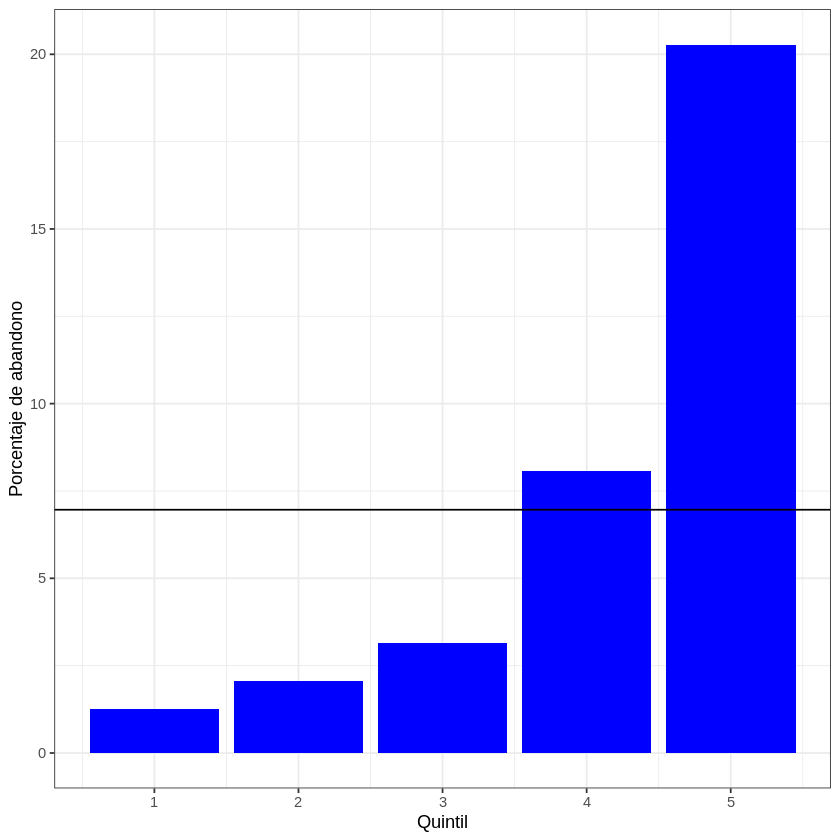

In [33]:
p <- mean(test$CHURN)*100
ggplot(df, aes(x=as.numeric(quintil), y = porc_churn)) +geom_bar(stat="identity", fill="blue")+geom_hline(yintercept = p)+ylab("Porcentaje de abandono")+xlab("Quintil")+theme_bw()

### Ganancia

Una alternativa es revisar la distribución de abandono acumulada.

In [34]:
#construimos la gráfica a partir de percentiles, no de quintiles.

df_y <- df_y %>% mutate(percentil = ntile(proba,100))
head(df_y)

,proba,y,quintil,percentil
,<dbl>,<dbl>,<ord>,<int>
1,0.5448246,0,5,93
10,0.8109608,0,5,100
12,0.2453518,0,4,70
16,0.2360665,0,4,68
21,0.2462605,0,4,70
25,0.7143919,0,5,99


Agrupamos por percentil y en cada uno de ellos calculamos el total de casos de abandono. También invertimos los percentiles.


In [35]:
df <- df_y %>% group_by(percentil) %>% summarise(n_churn = sum(y))
df$perc_inv <- 101-df$percentil
head(df)

percentil,n_churn,perc_inv
<int>,<dbl>,<dbl>
1,1,100
2,0,99
3,0,98
4,0,97
5,0,96
6,2,95


Ordenamos las observaciones de acuerdo al percentil inverso.

In [36]:
df <- df[order(df$perc_inv),]
head(df)

percentil,n_churn,perc_inv
<int>,<dbl>,<dbl>
100,26,1
99,15,2
98,17,3
97,13,4
96,21,5
95,14,6


Evaluamos el acumulado de casos de abandono en cada percentil

In [37]:
df$suma_acum <- cumsum(df$n_churn)
head(df)

percentil,n_churn,perc_inv,suma_acum
<int>,<dbl>,<dbl>,<dbl>
100,26,1,26
99,15,2,41
98,17,3,58
97,13,4,71
96,21,5,92
95,14,6,106


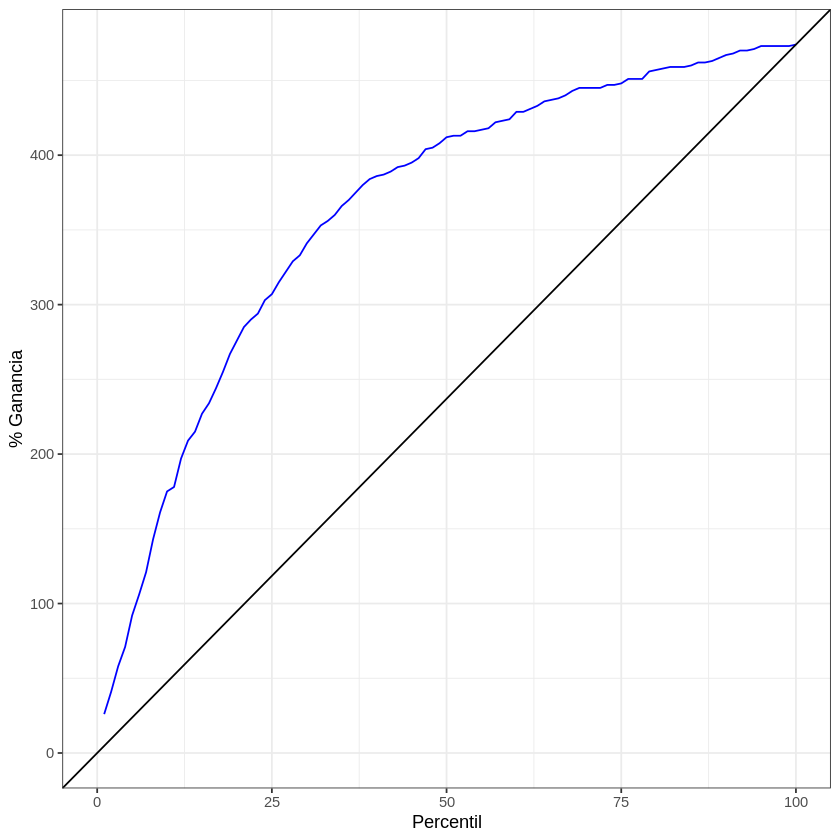

In [38]:
n <- sum(df$n_churn)
slope <- n/100
ggplot(df, aes(x=perc_inv, y = suma_acum))+geom_line(col = "blue")+ylim(0,n)+xlim(0,100)+xlab("Percentil")+ylab("% Ganancia")+geom_abline(slope=slope)+theme_bw()

In [39]:
n

[1] 474

<font color="red">Actividad </font>

Ajusta un modelo usando ```XGBoost```. Evalúa su calidad y compáralo con los resultados que obtuvimos con la regresión logística.

https://xgboost.readthedocs.io/en/stable/R-package/xgboostPresentation.html